100%|██████████| 9999/9999 [00:03<00:00, 2610.05it/s]


Training finished.

Obtian total reward of 8.0 after 14 steps
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)


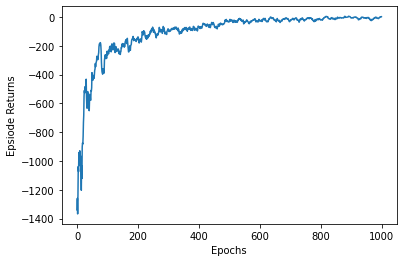

In [14]:
import random
import tqdm
import numpy as np
import matplotlib.pyplot as plt

import gym

import hw6_utils


class Agent:
    def __init__(self, state_space, action_space):
        """Initialize table for Q-value to all zeros.
        Please make sure the table has the shape [n_states, n_actions].
        """
        self._state_space = state_space
        self._action_space = action_space
        self.q_table = np.zeros([self._state_space.n, self._action_space.n])
    
    def act(self, state, epsilon, train=True):
        if train:
            return self._act_train(state, epsilon)
        else:
            return self._act_eval(state, epsilon)
    
    def _act_train(self, state, epsilon):
        """Implement epsilon-greedy strategy for action selection in training.
        """
        ref = random.uniform(0,1)
        if ref >= epsilon:
            action = self._act_eval(state,epsilon)
        else:
            action = self._action_space.sample()
            
        return action
    
    def _act_eval(self, state, epsilon):
        """Implement action selection in evaluation.
        """
        action = np.argmax(self.q_table[state])
        return action
    
    def update(self, state, action, reward, next_state, alpha, gamma):
        """Implement Q-value table update here.
        """
        self.q_table[state,action] = (1-alpha) * self.q_table[state,action]\
                                        + alpha * (reward + gamma * max(self.q_table[next_state]))


def train_agent(env, agent, epochs=10000, alpha=0.1, gamma=0.9, epsilon=0.1):
    
    all_ep_rewards = []
    
    for i in tqdm.tqdm(range(1, epochs)):
        
        state = env.reset()

        reward = 0
        done = False
        ep_reward = 0.0
    
        while not done:

            action = agent.act(state, epsilon, train=True)

            next_state, reward, done, info = env.step(action) 
            
            agent.update(state, action, reward, next_state, alpha, gamma)

            state = next_state
        
            ep_reward += reward
    
        all_ep_rewards.append(ep_reward)
        
    print("Training finished.\n")
    
    return all_ep_rewards


def eval_agent(env, agent, alpha=0.1, gamma=0.9, epsilon=0.1):

    state = env.reset()
    reward = 0

    all_rewards = 0.0
    all_frames = [env.render(mode='ansi')]
    
    done = False
    
    while not done:

        action = agent.act(state, epsilon, train=False)
        
        state, reward, done, info = env.step(action)
        
        all_frames.append(env.render(mode='ansi'))

        all_rewards += reward

    print(f"Obtian total reward of {np.sum(all_rewards)} after {len(all_frames)} steps")

    for _ in all_frames:
        print(_)


def q_learning(alpha=0.1, gamma=0.9, epsilon=0.1):

    env = gym.make("Taxi-v3").env

    agent = Agent(env.observation_space, env.action_space)

    all_ep_rewards = train_agent(env, agent, alpha=alpha, gamma=gamma, epsilon=epsilon)

    mov_avg_ep_rewards = hw6_utils.compute_moving_avg(all_ep_rewards)
    plt.plot(mov_avg_ep_rewards[:1000])
    plt.xlabel("Epochs")
    plt.ylabel("Epsiode Returns")
    plt.savefig("./train_moving_avg.png")

    eval_agent(env, agent, alpha=alpha, gamma=gamma, epsilon=epsilon)


if __name__ == "__main__":
    q_learning(alpha=0.1, gamma=0.9, epsilon=0.1)